In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
df=pd.read_csv("/content/drive/MyDrive/AI-ML/dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [127]:
df["num"] = df["num"].replace(2,1)
df["num"] = df["num"].replace(3,1)
df["num"] =df["num"].replace(4,1)


In [128]:
df.isnull().sum()

 age        0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [129]:
import statistics
df["ca"] = df["ca"].replace(np.NaN, statistics.mode(df["ca"]))

In [130]:
df["thal"] = df["thal"].replace(np.NaN, statistics.mode(df["thal"]))

In [131]:

df["ca"]

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    0.0
Name: ca, Length: 303, dtype: float64

In [132]:
df["thal"]

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


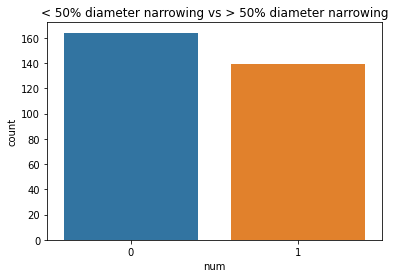

In [133]:
import seaborn as sns
x= sum(df.num == 0)
y= sum(df.num == 1)
sns.countplot(df.num).set_title("< 50% diameter narrowing vs > 50% diameter narrowing");

In [134]:
df=df.drop(["sex"],axis=1)

In [135]:
df=df.drop(["fbs"],axis=1)

In [136]:
df=df.drop(["exang"],axis=1)
df=df.drop(["oldpeak"],axis=1)
df=df.drop(["restecg"],axis=1)

In [137]:
df

,age,cp,trestbps,chol,thalach,slope,ca,thal,num
0,63,1,145,233,150,3,0.0,6.0,0
1,67,4,160,286,108,2,3.0,3.0,1
2,67,4,120,229,129,2,2.0,7.0,1
3,37,3,130,250,187,3,0.0,3.0,0
4,41,2,130,204,172,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,132,2,0.0,7.0,1
299,68,4,144,193,141,2,2.0,7.0,1
300,57,4,130,131,115,2,1.0,7.0,1
301,57,2,130,236,174,2,1.0,3.0,1


In [194]:
x=df.iloc[:,[0,7]].values
y=df.iloc[:,8].values

In [195]:
from sklearn.model_selection import train_test_split as split 

In [196]:
x_train,x_test,y_train,y_test=split(x,y,test_size=0.2,random_state=0)

In [197]:
x_train.shape

(242, 2)

In [198]:
x_test.shape

(61, 2)

In [199]:
from sklearn.linear_model import LogisticRegression as LR

In [200]:
model=LR()

In [201]:
model.fit(x_train,y_train)

LogisticRegression()

In [202]:
y_pred=model.predict(x_test)

In [203]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [204]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [205]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [206]:
accuracy_score(y_pred,y_test)

0.7540983606557377

In [207]:
confusion_matrix(y_pred,y_test)

array([[32, 12],
       [ 3, 14]])

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.82      0.54      0.65        26

    accuracy                           0.75        61
   macro avg       0.78      0.73      0.73        61
weighted avg       0.77      0.75      0.74        61

